In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

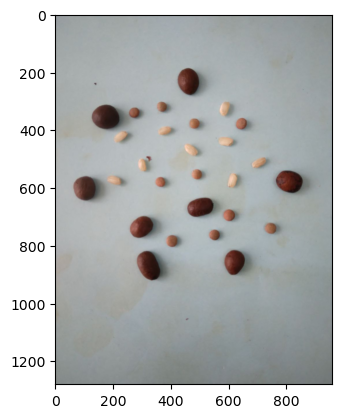

In [2]:
img_file = "archives/granos1.jpg"
# Image operation using thresholding
img = cv.imread(img_file)
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img2)

In [3]:
gris = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#gris = cv.equalizeHist(gris)
gris = cv.GaussianBlur(gris, (5,5), sigmaX=20, sigmaY=20)

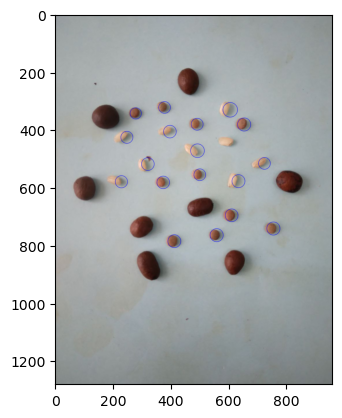

In [4]:
params = cv.SimpleBlobDetector_Params()

params.filterByArea = True
params.minArea = 800
params.maxArea = 2500


params.filterByCircularity = False
params.minCircularity = 0.1
params.maxCircularity = 0.6


params.filterByConvexity = False
params.minConvexity = 0.2

params.filterByInertia = False
params.minInertiaRatio = 0.1
params.maxInertiaRatio = 0.4


detector = cv.SimpleBlobDetector_create(params)

keypoints = detector.detect(gris)

blank = np.zeros((1,1))
img3 = img2.copy()
blobs = cv.drawKeypoints(img3, keypoints, blank, (0,0,255),
                         cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(blobs)